In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno
import pandas_profiling
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
import scikitplot as skplt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
import os

lemmatizer = nltk.stem.WordNetLemmatizer()


In [2]:
os.chdir("C:\GitBash")
df = pd.read_csv("Review_Rating_file.csv")


In [3]:
df

,Unnamed: 0,Review_title,Review_text,Ratings
0,0,No Backlit keyboard and Fingerprint sensor,Everything other than fingerprint sensor and b...,2.0 out of 5 stars
1,1,Wrong information,In description it is written that laptop is fu...,2.0 out of 5 stars
2,2,"It’s modified ssd and it’s not 512 GB, it’s 47...",Display specifications delivered item differen...,3.0 out of 5 stars
3,3,Improve battery backup because it is too poor.,Battery backup is too poor as see in photos. B...,3.0 out of 5 stars
4,4,Vendor is corrupt,I bought this laptop one year back and laptop ...,1.0 out of 5 stars
...,...,...,...,...
9901,9901,Very poor,After using for a month it's showing some prob...,1
9902,9902,Bad quality,"Very low sound, battery backup also not good, ...",2
9903,9903,Value-for-money,It's good value for 💸,4
9904,9904,Good choice,Good laptop !!!\nValue for money...!!!\nBest i...,4


In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 9906 Rows and 3 Columns in our dataframe


,Review_title,Review_text,Ratings
0,No Backlit keyboard and Fingerprint sensor,Everything other than fingerprint sensor and b...,2.0 out of 5 stars
1,Wrong information,In description it is written that laptop is fu...,2.0 out of 5 stars
2,"It’s modified ssd and it’s not 512 GB, it’s 47...",Display specifications delivered item differen...,3.0 out of 5 stars
3,Improve battery backup because it is too poor.,Battery backup is too poor as see in photos. B...,3.0 out of 5 stars
4,Vendor is corrupt,I bought this laptop one year back and laptop ...,1.0 out of 5 stars
5,Very poor Customer service.,"Very poor Customer service, don't buy this pro...",1.0 out of 5 stars
6,"Dont buy, Go for another brand. Lenovo is no good","on the 20th day of purchase, my screen went bl...",1.0 out of 5 stars
7,Not working very rare use,I bought this on 02/10/2021 within three month...,1.0 out of 5 stars
8,Poor Quality product,After one week Lines are visible on the displa...,1.0 out of 5 stars
9,"Camera issue, isb issue",Camera sometimes doesn’t work. USB ports doesn...,1.0 out of 5 stars


In [5]:
df.isna().sum() # checking for missing values

Review_title    516
Review_text     625
Ratings         518
dtype: int64

<AxesSubplot:>

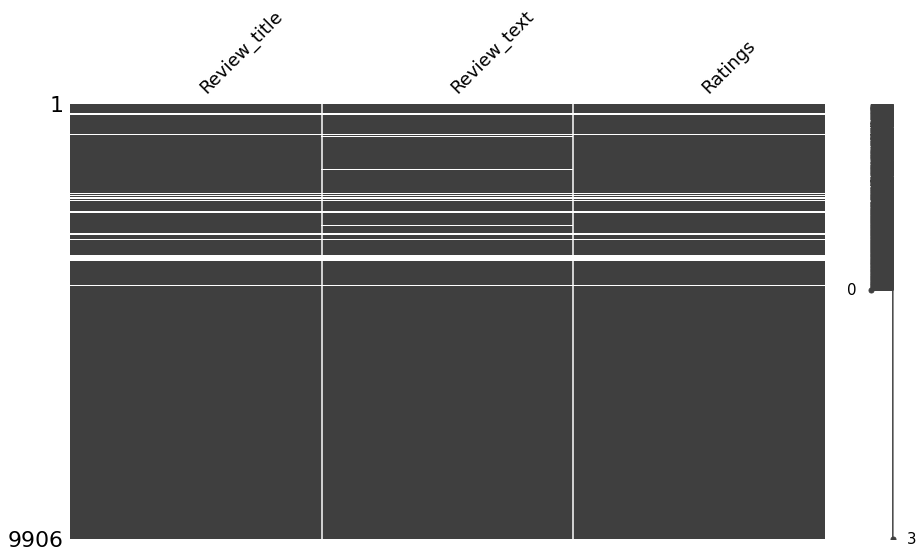

In [6]:
missingno.matrix(df, figsize = (15,8), fontsize=18)

In [7]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))


We have 9906 Rows and 3 Columns in our dataframe before removing NaN
We have 9278 Rows and 3 Columns in our dataframe after removing NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9278 entries, 0 to 9905
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  9278 non-null   object
 1   Review_text   9278 non-null   object
 2   Ratings       9278 non-null   object
dtypes: object(3)
memory usage: 289.9+ KB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here

In [9]:
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '1', '3',
       '2'], dtype=object)

Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [10]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

So we were able to incorporate the string object datatype values with numeric star values and the target column is clean with integer data in it.

In [11]:
# Now combining the "Review_title" and "Review_text" columns into one single column called "Review"
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']
df

,Review_title,Review_text,Ratings,Review
0,No Backlit keyboard and Fingerprint sensor,Everything other than fingerprint sensor and b...,2,No Backlit keyboard and Fingerprint sensor Eve...
1,Wrong information,In description it is written that laptop is fu...,2,Wrong information In description it is written...
2,"It’s modified ssd and it’s not 512 GB, it’s 47...",Display specifications delivered item differen...,3,"It’s modified ssd and it’s not 512 GB, it’s 47..."
3,Improve battery backup because it is too poor.,Battery backup is too poor as see in photos. B...,3,Improve battery backup because it is too poor....
4,Vendor is corrupt,I bought this laptop one year back and laptop ...,1,Vendor is corrupt I bought this laptop one yea...
...,...,...,...,...
9901,Very poor,After using for a month it's showing some prob...,1,Very poor After using for a month it's showing...
9902,Bad quality,"Very low sound, battery backup also not good, ...",2,"Bad quality Very low sound, battery backup als..."
9903,Value-for-money,It's good value for 💸,4,Value-for-money It's good value for 💸
9904,Good choice,Good laptop !!!\nValue for money...!!!\nBest i...,4,Good choice Good laptop !!!\nValue for money.....


I have combined the columns Review_title and Review_text to create a new column called Review that has the consolidated comments.

In [12]:
df['Review'][0]

'No Backlit keyboard and Fingerprint sensor Everything other than fingerprint sensor and backlit keyboard is fine. 8 gb RAM and 512 name ssd dies a great job... Although, backlight keyboard has become a compensation... very disappointing that there is no fingerprint sensor or backlit keyboard'

In [13]:
df['Review'][1]

'Wrong information In description it is written that laptop is full hd ips display<br><br>But it is not, it is tn dislpay'

In [14]:
df['Review'][2]

'It’s modified ssd and it’s not 512 GB, it’s 476 GB SSD. Display specifications delivered item different configuration, it’s modified ssd and it’s not 512 GB, it’s 476 GB SSD.'

## Text Processing to remove unwanted punctuations and special characters

In [15]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [16]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


## Visualizing text in first three rows after applying various text cleaning procedures

In [18]:
df['Review'][0]

'backlit keyboard fingerprint sensor everything fingerprint sensor backlit keyboard fine 8 gb ram 512 name ssd dies great job although backlight keyboard become compensation disappointing fingerprint sensor backlit keyboard'

In [19]:
df['Review'][1]

'wrong information description written laptop full hd ips display tn dislpay'

In [20]:
df['Review'][2]

'modified ssd 512 gb 476 gb ssd display specifications delivered item different configuration modified ssd 512 gb 476 gb ssd'

## LEMMATIZATION

In [21]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))


In [22]:
df['Review'][0]

'backlit keyboard fingerprint sensor everything fingerprint sensor backlit keyboard fine 8 gb ram 512 name ssd die great job although backlight keyboard become compensation disappoint fingerprint sensor backlit keyboard'

In [23]:
df['Review'][1]

'wrong information description write laptop full hd ip display tn dislpay'

In [24]:
df['Review'][2]

'modify ssd 512 gb 476 gb ssd display specification deliver item different configuration modify ssd 512 gb 476 gb ssd'

## STANDARDIXATION -TEXT NORMALIZATION

In [25]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))


In [26]:
df['Review'][0]

'backlit keyboard fingerprint sensor everything fingerprint sensor backlit keyboard fine  gb ram  name ssd die great job although backlight keyboard become compensation disappoint fingerprint sensor backlit keyboard'

In [27]:
df['Review'][1]

'wrong information description write laptop full hd ip display tn dislpay'

In [28]:
df['Review'][2]

'modify ssd  gb  gb ssd display specification deliver item different configuration modify ssd  gb  gb ssd'

## WORD COUNTS

In [29]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head(10)

,Review_WC,Review
0,29,backlit keyboard fingerprint sensor everything...
1,11,wrong information description write laptop ful...
2,20,modify ssd gb gb ssd display specification d...
3,18,improve battery backup poor battery backup poo...
4,24,vendor corrupt buy laptop one year back laptop...
5,37,poor customer service poor customer service bu...
6,36,dont buy go another brand lenovo good th day p...
7,16,work rare use buy within three month laptop e...
8,20,poor quality product one week line visible dis...
9,11,camera issue isb issue camera sometimes work u...


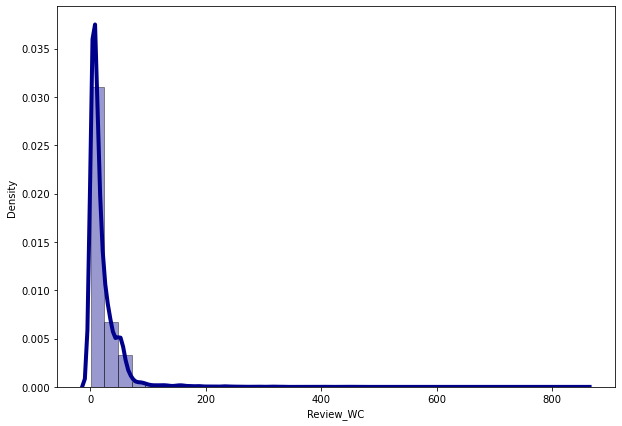

In [30]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

## CHARACTER COUNTS

In [31]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head(10)

,Review_CC,Review
0,214,backlit keyboard fingerprint sensor everything...
1,72,wrong information description write laptop ful...
2,104,modify ssd gb gb ssd display specification d...
3,109,improve battery backup poor battery backup poo...
4,144,vendor corrupt buy laptop one year back laptop...
5,213,poor customer service poor customer service bu...
6,211,dont buy go another brand lenovo good th day p...
7,85,work rare use buy within three month laptop e...
8,130,poor quality product one week line visible dis...
9,68,camera issue isb issue camera sometimes work u...


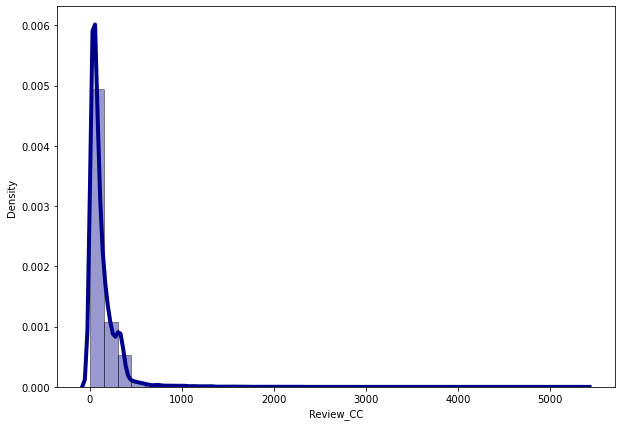

In [32]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

## REMIVING OUTLIERS

In [33]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))


We have 9143 Rows and 6 Columns in our dataframe after removing outliers


## VISUALIZATION

### Plotting histograms for word count and character count again after removing the outlier

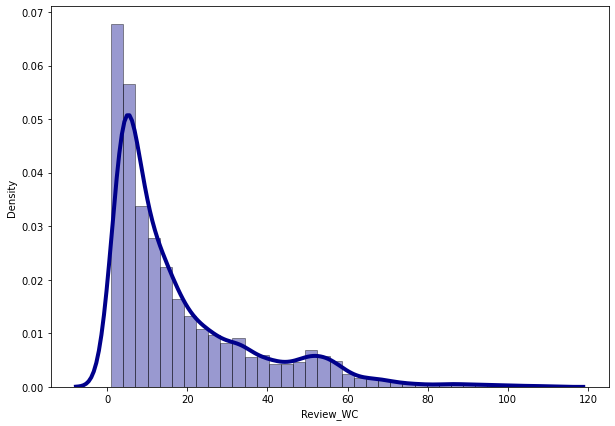

In [34]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram distribution plot we can see that number and density for short word reviews are greater than the one's with lengthy detailed information.

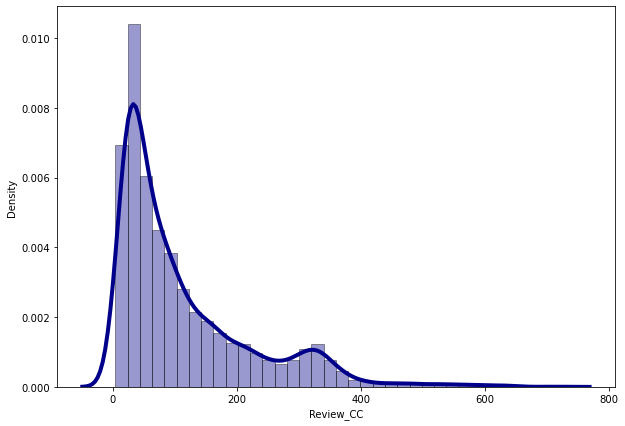

In [35]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In the above histogram distribution plot we can see that the character details are automatically similar to the word count details and very few people go to the lengths of typing summarized review comments.

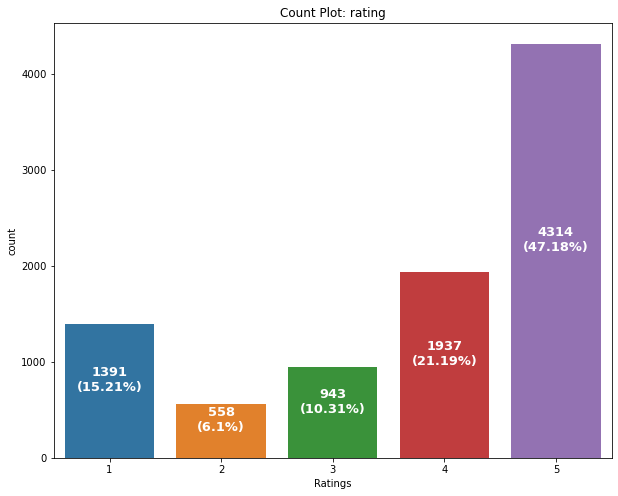

In [36]:
# Checking the ratings column details using count plot
x = 'Ratings'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()

We can see that the highest number of customer rating received are for 5 stars
Then we have 4 star rating reviews present in our dataset
However we see a high 1 star rating as well compared to 2 and 3 star rating reviews

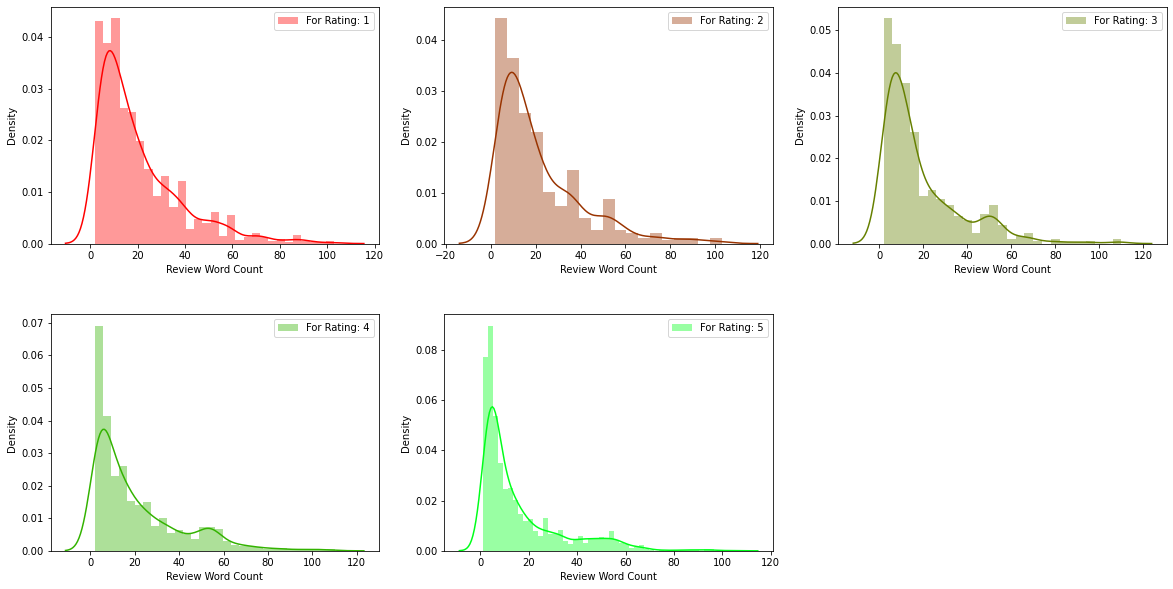

In [37]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

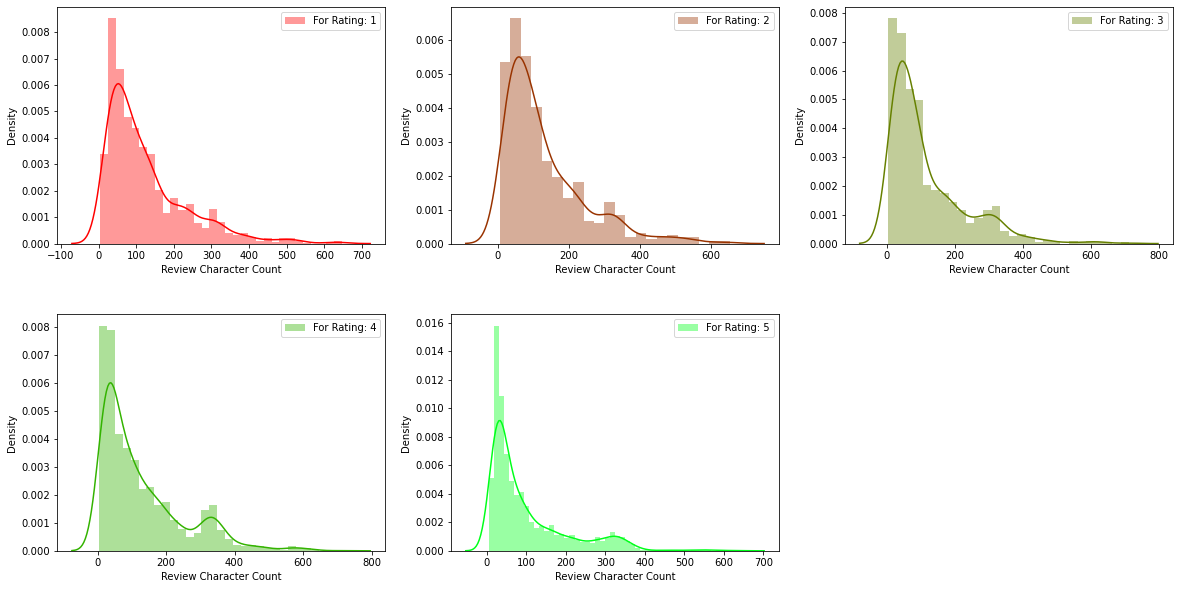

In [38]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

## Displaying loud words with Word Cloud information

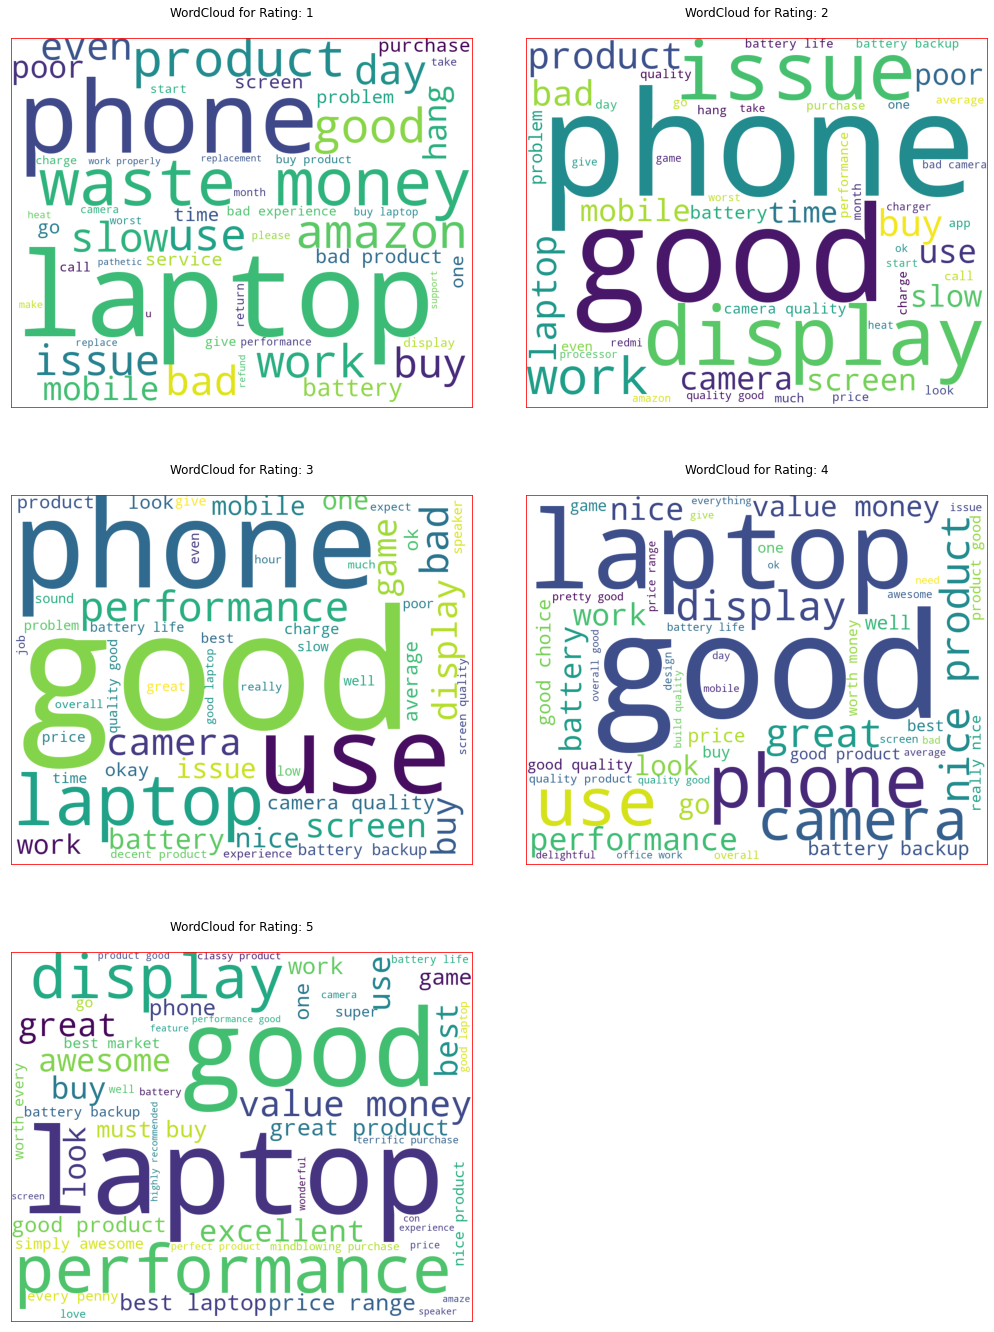

In [39]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Ratings.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Ratings==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()



For Rating: 1

It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc
For Rating: 2

It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc
For Rating: 3

It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc
For Rating: 4

It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc
For Rating: 5

It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

5    4314
4    1937
1    1391
3     943
2     558
Name: Ratings, dtype: int64


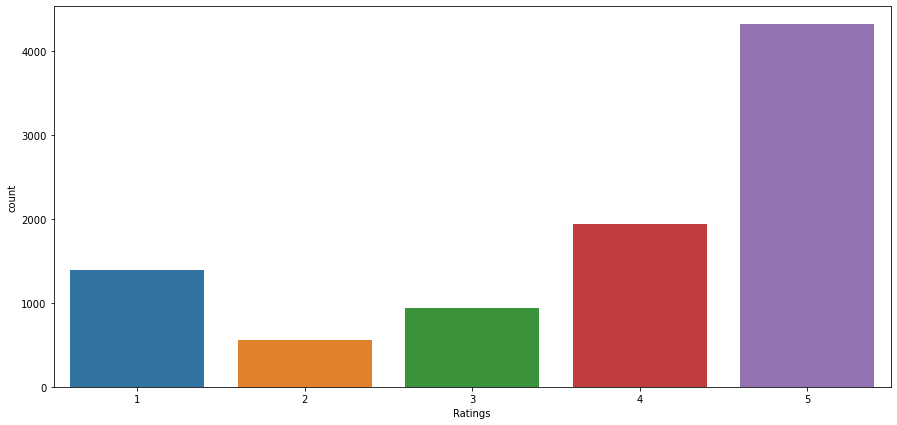

In [41]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star.
Which will cause the Imbalance problem for our Machine Learning model and make it bias.
So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart)
Then I will select equal number of data of every category and ensure that the rating values are balanced

In [49]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Waste,Waste don't order this,2,waste waste order,3,17
1,Nice product,Great laptop value for money.,4,nice product great laptop value money,6,37
2,Not recommended at all,Not booting. Even though I fully charged. Flip...,1,recommend boot even though fully charge flipka...,21,131
3,Unsatisfactory,Worst quality of product not at all function p...,1,unsatisfactory bad quality product function pr...,12,99
4,I would have given 4,27k is not the worthy price<br>If you have got...,3,would give k worthy price get k great deal al...,52,294
...,...,...,...,...,...,...
5423,Awesome,For some Reason the bluetooth on my Laptop doe...,4,awesome reason bluetooth laptop doesnt worki t...,54,368
5424,Best in the market!,very good product . Value for money,5,best market good product value money,6,36
5425,Avoid HP,"HP<br>1.NOT HAVING USER FRIENDLY INTERFACE,<br...",1,avoid hp hp not user friendly interface servi...,68,393
5426,Keyboard not working properly,Keyboard not working properly,1,keyboard work properly keyboard work properly,6,45


# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:1085]
df2 = df[df['Ratings']==2][0:1085]
df3 = df[df['Ratings']==3][0:1085]
df4 = df[df['Ratings']==4][0:1085]
df5 = df[df['Ratings']==5][0:1085]

# Combining all the dataframes into one and shuffling them again
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df

4    1085
5    1085
1    1085
3     943
2     558
Name: Ratings, dtype: int64


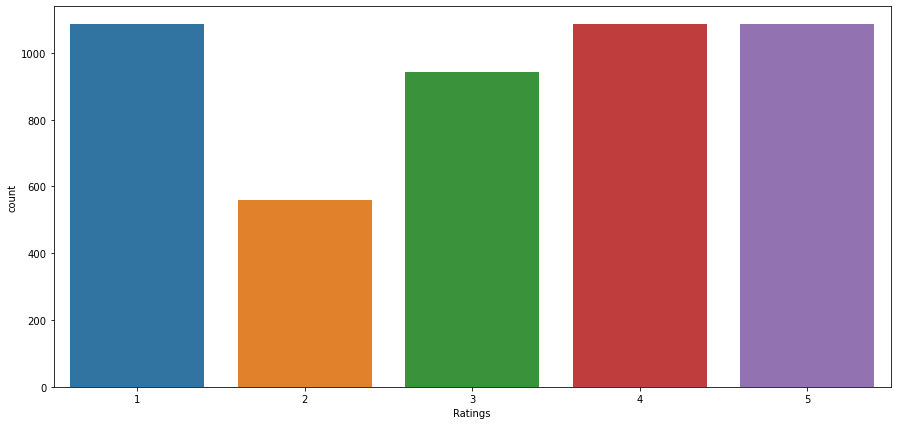

1085

In [54]:
# lets Check the count of target column again to confirm the balance with a visual
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()
1085

#WE HAVE ALMOST BALANCED OUR DATA

## Top 30 most frequently occuring words


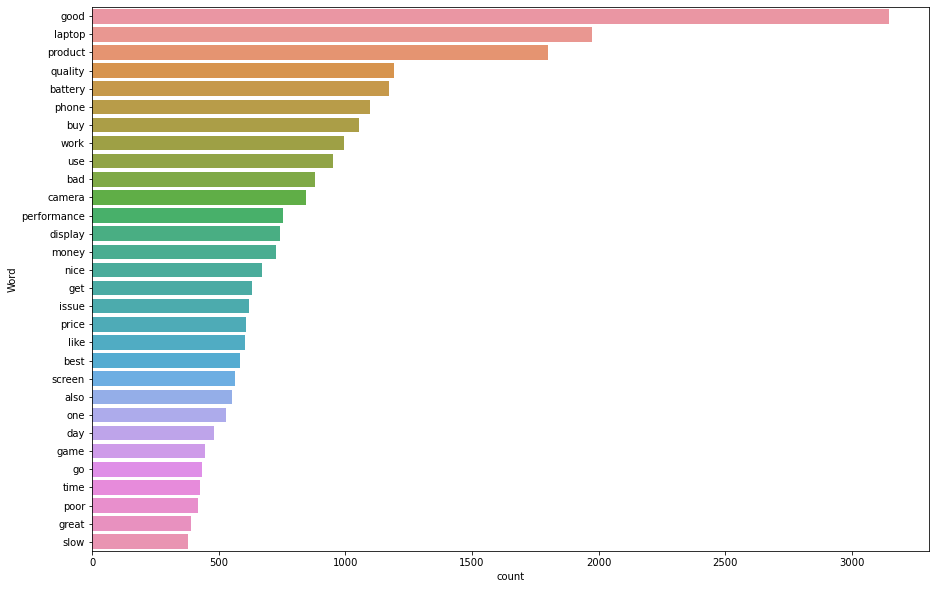

In [55]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])    

## Top 30 rarely occuring words

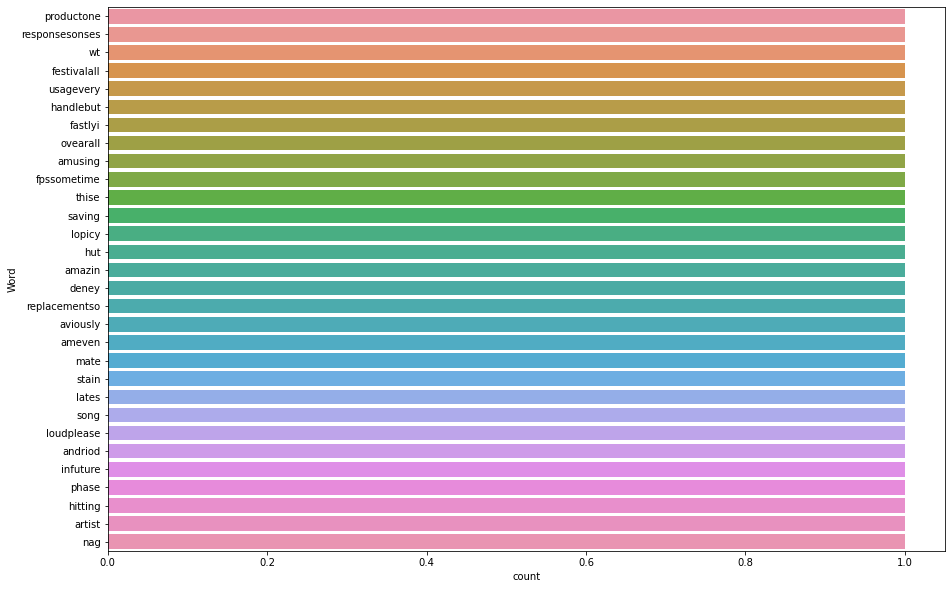

In [56]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])  

# MODEL BUILDING

In [57]:
# Separating features and labels here
x = df['Review']
y = df['Ratings']

## Converting text into vectors using TfidfVectorizer

In [58]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])


## SPLITTING DATA INTO TRAIN AND TEST DATASET

In [59]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (3329, 134575)
x_test (1427, 134575)
y_train (3329,)
y_test (1427,)


In [60]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()
lgb = LGBMClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

## Training and testing of all the classification algorithms

In [61]:
for model in [lr,svc,bnb,mnb,sgd,rf,lgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 80.16818500350385
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.80      0.91      0.86       330
           2       0.79      0.56      0.65       149
           3       0.74      0.79      0.76       289
           4       0.81      0.77      0.79       350
           5       0.86      0.84      0.85       309

    accuracy                           0.80      1427
   macro avg       0.80      0.78      0.78      1427
weighted avg       0.80      0.80      0.80      1427

CONFUSION MATRIX: 
 [[301  11  13   2   3]
 [ 36  83  24   5   1]
 [ 23   7 229  21   9]
 [  9   4  37 271  29]
 [  5   0   7  37 260]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURACY SCORE PERCENTAGE: 79.67

We can see that the accuracy scores for the algorithms above and we shall cross validate them to choose the best scored classification algorithm amongst them.

## CROSS VALIDATION SCORE 

In [62]:
#checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,bnb,mnb,sgd,rf,lgb]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 77.31308253209272


******************************LinearSVC******************************
Cross validation score: 77.90183028948091


******************************BernoulliNB******************************
Cross validation score: 58.3681344254339


******************************MultinomialNB******************************
Cross validation score: 68.14551086465033


******************************SGDClassifier******************************
Cross validation score: 77.62851342517267


******************************RandomForestClassifier******************************
Cross validation score: 75.79907258968127


******************************LGBMClassifier******************************
Cross validation score: 76.76614382152987




In the above cell we cross validated the algorithms to ensure we pick the best option that does not have any over fitting or underfitting concerns. We can see that RandomForestClassifier has produced the best outcome and we shall use it for further tuning the accuracy percentage.

## HYPERPARAMETER TUNING

In [63]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.712 total time=  38.8s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.702 total time=  47.2s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.719 total time=  43.2s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.713 total time= 1.1min
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.713 total time= 1.1min
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.721 total time= 1.3min
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.718 total time=  38.4s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.714 total time=  44.3s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [64]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 500,
 'n_estimators': 100}

## FINAL MODEL

In [65]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")


ACCURACY SCORE: 79.25718290119131

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.76      0.92      0.83       330
           2       0.88      0.52      0.66       149
           3       0.76      0.76      0.76       289
           4       0.79      0.77      0.78       350
           5       0.86      0.84      0.85       309

    accuracy                           0.79      1427
   macro avg       0.81      0.76      0.77      1427
weighted avg       0.80      0.79      0.79      1427


CONFUSION MATRIX: 
 [[302   4  14   5   5]
 [ 39  78  24   8   0]
 [ 33   6 221  22   7]
 [ 21   0  27 270  32]
 [  4   1   6  38 260]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

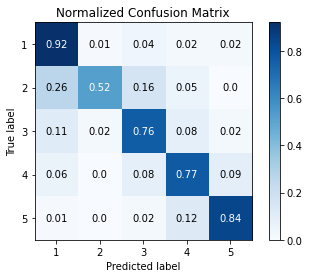

In [66]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)


## SAVING BEST MODEL

In [67]:
joblib.dump(best_model, "Ratings_Prediction_Saved_Model.pkl")


['Ratings_Prediction_Saved_Model.pkl']

## LOADING FINAL MODEL

In [68]:
Model = joblib.load("Ratings_Prediction_Saved_Model.pkl")

In [69]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,1,3
1,5,3
2,1,4
3,5,4
4,4,5
...,...,...
1422,5,3
1423,1,1
1424,3,3
1425,4,3


In [70]:
# Converting the dataframe into CSV format and saving it
results.to_csv('Predicted_vs_Actual_Ratings_Results.csv', index=False)


Final Remarks: After applying the hyper parameter tuning the best accuracy score obtained was 79.25% which can be further improved by obtaining more data and working up through other parameter combinations.

>>>>>>>>>>>>>>>>>>>>>>>>THANK  YOU <<<<<<<<<<<<<<<<<<<